In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Reading dataset 

df = pd.read_excel(r"C:\Users\Dell\Downloads\Assignment_Data_vF (1).xls")

Time_Stamp = pd.date_range(start = '2019-01-01', periods = len(df),freq = 'D')
Time_Stamp

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06',
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-12'],
              dtype='datetime64[ns]', length=1167, freq='D')

In [3]:
df['Time_Stamp'] = Time_Stamp

In [4]:
df.set_index(keys='Time_Stamp',inplace= True)
df.head()

,DATE,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2019-01-01,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0
2019-01-02,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0
2019-01-03,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0
2019-01-04,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0
2019-01-05,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0


In [5]:
df.shape

(1167, 7)

In [6]:
# Dropping 'Adj Close' column

df = df.drop(['Adj Close'],axis=1)
df.head()

,DATE,Open,High,Low,Close,Volume
Time_Stamp,,,,,,
2019-01-01,1,9646.700195,9647.049805,9598.500000,9616.400391,141400.0
2019-01-02,2,9615.549805,9654.150391,9595.400391,9606.900391,129700.0
2019-01-03,3,9621.549805,9627.400391,9580.450195,9618.150391,181800.0
2019-01-04,4,9617.900391,9621.400391,9560.799805,9578.049805,171100.0
2019-01-05,5,9595.450195,9615.849609,9565.500000,9588.049805,213200.0


In [7]:
df.tail(10)

,DATE,Open,High,Low,Close,Volume
Time_Stamp,,,,,,
2022-03-03,1158,16933.250000,17375.000000,16839.250000,17352.449219,298700.0
2022-03-04,1159,17408.449219,17490.599609,17257.699219,17322.199219,244500.0
2022-03-05,1160,17396.550781,17442.900391,17235.849609,17304.599609,232100.0
2022-03-06,1161,17236.050781,17380.800781,17219.199219,17276.300781,189600.0
2022-03-07,1162,17192.250000,17351.050781,17070.699219,17206.650391,215200.0
2022-03-08,1163,16847.949219,17148.550781,16843.800781,17092.199219,300100.0
2022-03-09,1164,17194.500000,17220.699219,17027.849609,17063.250000,200200.0
2022-03-10,1165,16548.900391,16705.250000,16203.250000,16247.950195,458000.0
2022-03-11,1166,16515.650391,16748.800781,16478.300781,16658.400391,329800.0


In [8]:
df.shape

(1167, 6)

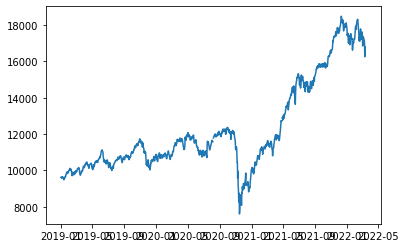

In [9]:
plt.plot(df.Close)

In [10]:
#dataframe1 = df.ffill()
#print(dataframe1)

In [11]:
#df1=df.reset_index()['Close']
df1 = df.drop(columns = ['DATE','Open','High','Low','Volume'],axis =1)

In [12]:
df1

,Close
Time_Stamp,
2019-01-01,9616.400391
2019-01-02,9606.900391
2019-01-03,9618.150391
2019-01-04,9578.049805
2019-01-05,9588.049805
...,...
2022-03-08,17092.199219
2022-03-09,17063.250000
2022-03-10,16247.950195


In [13]:
df1.isna().sum()

Close    4
dtype: int64

In [14]:
df1 = df1.interpolate(limit=1, limit_direction="forward");

In [15]:
df1.isna().sum()

Close    0
dtype: int64

In [16]:
df1

,Close
Time_Stamp,
2019-01-01,9616.400391
2019-01-02,9606.900391
2019-01-03,9618.150391
2019-01-04,9578.049805
2019-01-05,9588.049805
...,...
2022-03-08,17092.199219
2022-03-09,17063.250000
2022-03-10,16247.950195


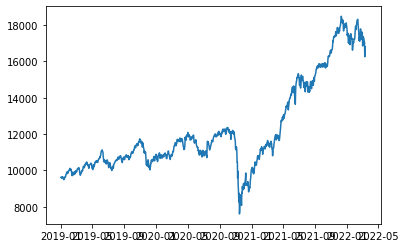

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [18]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[0.18461279]
 [0.18373857]
 [0.18477383]
 ...
 [0.79487058]
 [0.8326416 ]
 [0.84511077]]


In [21]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [22]:
training_size,test_size

(758, 409)

In [23]:
train_data

array([[0.18461279],
       [0.18373857],
       [0.18477383],
       [0.18108364],
       [0.18200387],
       [0.1883995 ],
       [0.18802682],
       [0.18619552],
       [0.18586427],
       [0.1807984 ],
       [0.17495033],
       [0.17309602],
       [0.17427849],
       [0.17582455],
       [0.18448392],
       [0.18432746],
       [0.18656361],
       [0.1899639 ],
       [0.18915869],
       [0.19884415],
       [0.2002245 ],
       [0.20298979],
       [0.20994681],
       [0.20945443],
       [0.21217838],
       [0.20400672],
       [0.21067374],
       [0.20825355],
       [0.21211395],
       [0.21682098],
       [0.21665068],
       [0.22181325],
       [0.22180399],
       [0.22124727],
       [0.2270079 ],
       [0.23046345],
       [0.22741284],
       [0.22116909],
       [0.22602332],
       [0.22519511],
       [0.21793901],
       [0.21145136],
       [0.20337172],
       [0.19329974],
       [0.20096995],
       [0.21046211],
       [0.21109252],
       [0.204

In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(657, 100)
(657,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(308, 100)
(308,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 7s 259ms/step - loss: 0.0244 - val_loss: 0.1000
Epoch 2/100
11/11 [==============================] - 2s 161ms/step - loss: 0.0048 - val_loss: 0.0317
Epoch 3/100
11/11 [==============================] - 2s 156ms/step - loss: 0.0027 - val_loss: 0.0762
Epoch 4/100
11/11 [==============================] - 2s 154ms/step - loss: 0.0022 - val_loss: 0.0430
Epoch 5/100
11/11 [==============================] - 2s 158ms/step - loss: 0.0019 - val_loss: 0.0496
Epoch 6/100
11/11 [==============================] - 2s 158ms/step - loss: 0.0018 - val_loss: 0.0337
Epoch 7/100
11/11 [==============================] - 2s 158ms/step - loss: 0.0017 - val_loss: 0.0276
Epoch 8/100
11/11 [==============================] - 2s 155ms/step - loss: 0.0016 - val_loss: 0.0229
Epoch 9/100
11/11 [==============================] - 2s 176ms/step - loss: 0.0015 - val_loss: 0.0182
Epoch 10/100
11/11 [==============================] - 1s 119ms/step - loss: 0.0014 - val_lo

11/11 [==============================] - 2s 140ms/step - loss: 3.7853e-04 - val_loss: 0.0172
Epoch 80/100
11/11 [==============================] - 2s 140ms/step - loss: 3.5684e-04 - val_loss: 0.0236
Epoch 81/100
11/11 [==============================] - 2s 140ms/step - loss: 3.6137e-04 - val_loss: 0.0184
Epoch 82/100
11/11 [==============================] - 2s 141ms/step - loss: 4.1464e-04 - val_loss: 0.0296
Epoch 83/100
11/11 [==============================] - 2s 141ms/step - loss: 3.7437e-04 - val_loss: 0.0225
Epoch 84/100
11/11 [==============================] - 2s 140ms/step - loss: 4.3198e-04 - val_loss: 0.0175
Epoch 85/100
11/11 [==============================] - 2s 141ms/step - loss: 3.4949e-04 - val_loss: 0.0384
Epoch 86/100
11/11 [==============================] - 2s 141ms/step - loss: 3.6003e-04 - val_loss: 0.0107
Epoch 87/100
11/11 [==============================] - 2s 141ms/step - loss: 4.8106e-04 - val_loss: 0.0204
Epoch 88/100
11/11 [==============================] - 2s 14

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.9.1'

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

10/10 [==============================] - 0s 27ms/step


In [36]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
test_predict

array([[13053.002 ],
       [13101.576 ],
       [13155.574 ],
       [13220.925 ],
       [13300.203 ],
       [13386.544 ],
       [13483.256 ],
       [13572.471 ],
       [13647.805 ],
       [13709.266 ],
       [13756.097 ],
       [13800.977 ],
       [13849.122 ],
       [13898.14  ],
       [13894.845 ],
       [13860.627 ],
       [13826.    ],
       [13816.453 ],
       [13843.149 ],
       [13899.828 ],
       [13974.33  ],
       [14049.9   ],
       [14118.366 ],
       [14184.988 ],
       [14251.306 ],
       [14305.638 ],
       [14343.802 ],
       [14388.531 ],
       [14451.633 ],
       [14531.777 ],
       [14615.937 ],
       [14695.881 ],
       [14747.436 ],
       [14756.091 ],
       [14758.231 ],
       [14775.248 ],
       [14800.102 ],
       [14805.418 ],
       [14779.558 ],
       [14705.778 ],
       [14589.486 ],
       [14438.303 ],
       [14344.96  ],
       [14350.224 ],
       [14442.237 ],
       [14591.531 ],
       [14761.08  ],
       [14939

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10829.036148487765

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

17067.77349692088

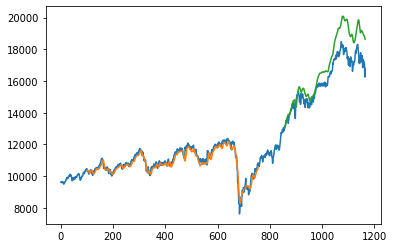

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

409

In [42]:
x_input=test_data[309:].reshape(1,-1)
x_input.shape

(1, 100)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.9235238781175553,
 0.9368074205242946,
 0.9464560385594499,
 0.9511262263196537,
 0.9553593029101833,
 0.9709849488037651,
 0.9872547585263401,
 1.0,
 0.9946349636682456,
 0.9806335667468974,
 0.9724894954803348,
 0.9666736883008656,
 0.9676399340443561,
 0.9807992808366547,
 0.9755124284172701,
 0.9429638222425417,
 0.9258843144149472,
 0.9496263526835699,
 0.9458808922835628,
 0.9403824938860813,
 0.9484438878294735,
 0.9624084394080142,
 0.960172198817086,
 0.9576828938647676,
 0.9444683689191117,
 0.96555556795939,
 0.9661720528968624,
 0.9560264725902125,
 0.9467736271551693,
 0.9344563303998975,
 0.9024091799074642,
 0.9103967035355555,
 0.9022711448012511,
 0.9134243095129765,
 0.8665107062111325,
 0.8690413498250361,
 0.8625306939819933,
 0.8794355011742988,
 0.9010379952966213,
 0.8821776907662991,
 0.8560017053284009,
 0.8803372226834602,
 0.907304753137537,
 0.9116390194914717,
 0.9111283974499137,
 0.8979643776171292,
 0.8939751990287267,
 0.884450776700035,
 0.886935408

In [45]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9895799]
101
1 day input [0.93680742 0.94645604 0.95112623 0.9553593  0.97098495 0.98725476
 1.         0.99463496 0.98063357 0.9724895  0.96667369 0.96763993
 0.98079928 0.97551243 0.94296382 0.92588431 0.94962635 0.94588089
 0.94038249 0.94844389 0.96240844 0.9601722  0.95768289 0.94446837
 0.96555557 0.96617205 0.95602647 0.94677363 0.93445633 0.90240918
 0.9103967  0.90227114 0.91342431 0.86651071 0.86904135 0.86253069
 0.8794355  0.901038   0.88217769 0.85600171 0.88033722 0.90730475
 0.91163902 0.9111284  0.89796438 0.8939752  0.88445078 0.88693541
 0.86271474 0.82857406 0.84298956 0.85997704 0.87075762 0.86442185
 0.87201378 0.88554122 0.88373292 0.88284486 0.89665772 0.92165573
 0.93817861 0.94922141 0.93271705 0.93886411 0.95640391 0.96123047
 0.9756413  0.97982387 0.97963515 0.98445254 0.96650348 0.95043156
 0.93373848 0.92086904 0.87779741 0.88965459 0.87421317 0.87345847
 0.89535088 0.91716042 0.93585501 0.9156282  0.91158851 0.88373292
 0.888624   0.90675729 0.9198291  

10 day output [[1.3357552]]
11 day input [0.96667369 0.96763993 0.98079928 0.97551243 0.94296382 0.92588431
 0.94962635 0.94588089 0.94038249 0.94844389 0.96240844 0.9601722
 0.95768289 0.94446837 0.96555557 0.96617205 0.95602647 0.94677363
 0.93445633 0.90240918 0.9103967  0.90227114 0.91342431 0.86651071
 0.86904135 0.86253069 0.8794355  0.901038   0.88217769 0.85600171
 0.88033722 0.90730475 0.91163902 0.9111284  0.89796438 0.8939752
 0.88445078 0.88693541 0.86271474 0.82857406 0.84298956 0.85997704
 0.87075762 0.86442185 0.87201378 0.88554122 0.88373292 0.88284486
 0.89665772 0.92165573 0.93817861 0.94922141 0.93271705 0.93886411
 0.95640391 0.96123047 0.9756413  0.97982387 0.97963515 0.98445254
 0.96650348 0.95043156 0.93373848 0.92086904 0.87779741 0.88965459
 0.87421317 0.87345847 0.89535088 0.91716042 0.93585501 0.9156282
 0.91158851 0.88373292 0.888624   0.90675729 0.9198291  0.89856253
 0.84961075 0.89651034 0.89372663 0.89210705 0.8895029  0.88309343
 0.87256125 0.86989724 0

20 day output [[1.872571]]
21 day input [0.96240844 0.9601722  0.95768289 0.94446837 0.96555557 0.96617205
 0.95602647 0.94677363 0.93445633 0.90240918 0.9103967  0.90227114
 0.91342431 0.86651071 0.86904135 0.86253069 0.8794355  0.901038
 0.88217769 0.85600171 0.88033722 0.90730475 0.91163902 0.9111284
 0.89796438 0.8939752  0.88445078 0.88693541 0.86271474 0.82857406
 0.84298956 0.85997704 0.87075762 0.86442185 0.87201378 0.88554122
 0.88373292 0.88284486 0.89665772 0.92165573 0.93817861 0.94922141
 0.93271705 0.93886411 0.95640391 0.96123047 0.9756413  0.97982387
 0.97963515 0.98445254 0.96650348 0.95043156 0.93373848 0.92086904
 0.87779741 0.88965459 0.87421317 0.87345847 0.89535088 0.91716042
 0.93585501 0.9156282  0.91158851 0.88373292 0.888624   0.90675729
 0.9198291  0.89856253 0.84961075 0.89651034 0.89372663 0.89210705
 0.8895029  0.88309343 0.87256125 0.86989724 0.79487058 0.8326416
 0.84511077 0.98957992 0.9969849  1.01884782 1.04968739 1.08541036
 1.12364435 1.16333401 1.2

In [46]:
l = scaler.inverse_transform(lst_output).reshape(-1)
l

array([18363.81780405, 18444.28627958, 18681.86632025, 19016.9937012 ,
       19405.18810995, 19820.66932144, 20251.96895051, 20696.25261033,
       21154.85588264, 21630.47195309, 22125.63596568, 22642.05658414,
       23180.31286281, 23739.78040752, 24318.60417167, 24913.72695557,
       25520.95288217, 26135.15336944, 26750.44978507, 27360.54896122,
       27959.10591309, 28540.07878499, 29098.09286442, 29628.66857656,
       30128.39895735, 30594.99758412, 31027.25971292, 31424.94180413,
       31788.60866243, 32119.44948668])

In [47]:
date = []
nifty = []
c = 1167
for i in l:
    c=c+1
    date.append(c)
    nifty.append(i)
d = pd.DataFrame(list(zip(date, nifty)),columns =['Date', 'Nifty'])

In [48]:
d

,Date,Nifty
0,1168,18363.817804
1,1169,18444.286280
2,1170,18681.866320
3,1171,19016.993701
4,1172,19405.188110
5,1173,19820.669321
6,1174,20251.968951
7,1175,20696.252610
8,1176,21154.855883
9,1177,21630.471953


In [49]:
d.to_csv('Output_File_to_Predict.csv')

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
len(df1)

1167

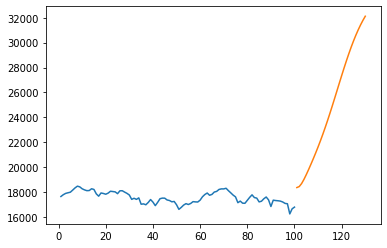

In [53]:
plt.plot(day_new,scaler.inverse_transform(df1[1067:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

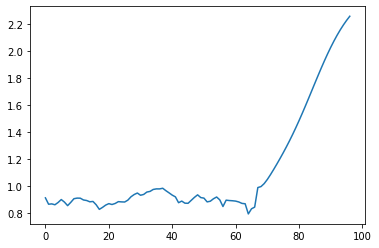

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])

In [55]:
df3=scaler.inverse_transform(df3).tolist()

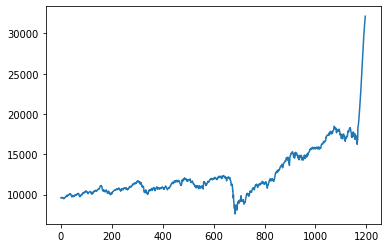

In [56]:
plt.plot(df3)